**[PI1-01]**

Import modules.

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
matplotlib.rcParams['font.size'] = 12

**[PI1-02]**

Define the Gridworld class.

In [0]:
class Gridworld:
  def __init__(self, size=8):
    self.size = size
    self.states = range(size)
    self.actions = [-1, 1]

    self.policy = {}
    for s in self.states:
      self.policy[(s, 1)] = 1/2
      self.policy[(s, -1)] = 1/2

    self.value = {}
    for s in self.states:
      self.value[s] = 0

  def move(self, s, a):
    if s in (0, self.size-1): # Terminal state
      return 0, s       # Reward, Next state
    
    s_new = s + a
    
    if s_new == 0:
      return 1, s_new   # Reward, Next state

    if s_new == self.size-1:
      return -1, s_new  # Reward, Next state

    return 0, s_new     # Reward, Next state

**[PI1-03]**

Define a function to show state values.

In [0]:
  def show_values(world, title='Values'):
    fig = plt.figure(figsize=(world.size*0.8, 1.7))
    subplot = fig.add_subplot(1, 1, 1)
    result = np.zeros([1, world.size])
    for s in world.states:
      result[0][s]  = world.value[s]
    sns.heatmap(result, square=True, cbar=False, yticklabels=[],
                annot=True, fmt='3.1f', cmap='coolwarm',
                ax=subplot).set_title(title)

**[PI1-04]**

Define a function to apply the policy evaluation algorithm until conversion.

In [0]:
def policy_eval(world, gamma=1, delta=0.01):
  while True:
    delta_max = 0
    for s in world.states:
      v_new = 0
      for a in world.actions:
        r, s_new = world.move(s, a)
        v_new += world.policy[(s, a)] * (r + gamma * world.value[s_new])
      delta_max = max(delta_max, abs(world.value[s] - v_new))
      world.value[s] = v_new

    if delta_max < delta:
      break

**[PI1-05]**

Define a function to apply the policy update algorithm.

In [0]:
def policy_update(world, gamma=1):
  update = False
  for s in world.states:
    q_max = -10**10
    a_best = None
    for a in world.actions:
      r, s_new = world.move(s, a)
      q = r + gamma * world.value[s_new]
      if q > q_max:
        q_max = q
        a_best = a

    if world.policy[(s, a_best)] != 1:
      update = True
    for a in world.actions:
      world.policy[(s, a)] = 0
    world.policy[(s, a_best)] = 1
  
  return update

**[PI1-06]**

Create a Gridworld instance. Then apply the policy evaluation algorithm and show the state values.

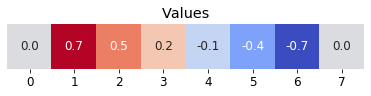

In [0]:
world = Gridworld(size=8)
policy_eval(world)
show_values(world)

**[PI1-07]**

Apply the policy update algorithm and show the resulting policy.

In [0]:
policy_update(world)
for (s, a), p in world.policy.items():
  if s not in [0, 7]:
    print('p({:d},{:2d}) = {}'.format(s, a, p))

p(1, 1) = 0
p(1,-1) = 1
p(2, 1) = 0
p(2,-1) = 1
p(3, 1) = 0
p(3,-1) = 1
p(4, 1) = 0
p(4,-1) = 1
p(5, 1) = 0
p(5,-1) = 1
p(6, 1) = 0
p(6,-1) = 1


**[PI1-08]**

Apply the policy evaluation algorithm and show the state values.

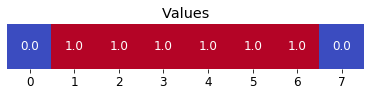

In [0]:
policy_eval(world)
show_values(world)

**[PI1-09]**

Apply the policy update algorithm to check if the policy still changes or not.

In [0]:
policy_update(world)

False